In [1]:
import pandas as pd

files = [
    'Kostanay Kazakhstan 2017-11-01 to 2018-03-31.csv',
    'Kostanay Kazakhstan 2020-11-01 to 2021-03-31.csv',
    'petropavlovsk, kazakhstan... 2017-11-01 to 2018-03-31.csv',
    'petropavlovsk, kazakhstan... 2020-11-01 to 2021-03-31.csv',
    'Atbasar kazakhstan 2017-11-01 to 2018-03-31.csv',
    'Atbasar kazakhstan 2018-11-01 to 2019-03-31.csv',
    'Atbasar kazakhstan 2019-11-01 to 2020-03-31.csv',
    'Atbasar kazakhstan 2020-11-01 to 2021-03-31.csv',
    'Atbasar kazakhstan 2021-11-01 to 2022-03-31.csv',
    'Atbasar kazakhstan 2022-11-01 to 2023-03-31.csv'
]
dataframes = [pd.read_csv(file) for file in files]

data = pd.concat(dataframes, ignore_index=True)

data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Kostanay Kazakhstan,2017-11-01,7.6,0.0,3.4,4.2,-4.9,-0.8,0.5,82.6,...,6.4,3,NaN,2017-11-01T08:43:41,2017-11-01T18:13:45,0.40,"Rain, Partially cloudy",Becoming cloudy in the afternoon with early mo...,rain,"UAUU,28952099999"
1,Kostanay Kazakhstan,2017-11-02,5.8,-1.0,2.1,2.3,-5.4,-2.3,-0.7,82.6,...,5.8,3,NaN,2017-11-02T08:45:35,2017-11-02T18:11:49,0.44,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"UAUU,28952099999"
2,Kostanay Kazakhstan,2017-11-03,3.1,-2.0,0.6,0.6,-4.6,-2.3,-1.7,84.9,...,4.8,3,NaN,2017-11-03T08:47:29,2017-11-03T18:09:56,0.47,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"UAUU,28952099999"
3,Kostanay Kazakhstan,2017-11-04,1.7,-6.0,-2.1,1.7,-10.7,-5.7,-3.9,88.2,...,5.5,3,NaN,2017-11-04T08:49:23,2017-11-04T18:08:04,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"UAUU,28952099999"
4,Kostanay Kazakhstan,2017-11-05,5.7,-3.0,2.0,3.4,-5.9,-0.2,0.7,91.6,...,2.9,2,NaN,2017-11-05T08:51:16,2017-11-05T18:06:13,0.54,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,snow,"UAUU,28952099999"


In [2]:
low_temp = 0
dzud = []
for i in range(data.shape[0]):
    if data['tempmin'][i]<-27 and data['snowdepth'][i]>=20 and data['windspeed'][i]>=20:
        dzud.append(1)
    else:
        dzud.append(0)
data['Dzud'] = dzud
c = 0
for i in data['Dzud']:
    if i!=0:
        c+=1
c

27

In [3]:
data.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
Dzud                  int64
dtype: object

In [4]:
data = data[data['tempmin'] <= -27]
data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,Dzud
43,Kostanay Kazakhstan,2017-12-14,-19.1,-29.0,-24.7,-20.0,-36.2,-27.4,-27.5,77.2,...,2,NaN,2017-12-14T09:53:00,2017-12-14T17:27:20,0.86,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"UAUU,28952099999",0
44,Kostanay Kazakhstan,2017-12-15,-17.5,-28.0,-23.8,-17.5,-37.1,-27.2,-26.6,77.6,...,2,NaN,2017-12-15T09:53:53,2017-12-15T17:27:26,0.90,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"UAUU,28952099999",0
45,Kostanay Kazakhstan,2017-12-16,-17.0,-29.0,-24.4,-17.0,-30.4,-24.6,-27.3,76.7,...,2,NaN,2017-12-16T09:54:43,2017-12-16T17:27:34,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"UAUU,28952099999",0
46,Kostanay Kazakhstan,2017-12-17,-14.0,-29.0,-23.6,-14.0,-30.4,-24.1,-26.4,77.9,...,2,NaN,2017-12-17T09:55:30,2017-12-17T17:27:47,0.97,Clear,Clear conditions throughout the day.,clear-day,"UAUU,28952099999",0
47,Kostanay Kazakhstan,2017-12-18,-14.0,-28.7,-22.9,-14.0,-35.7,-24.7,-25.8,77.7,...,2,NaN,2017-12-18T09:56:14,2017-12-18T17:28:03,0.00,Clear,Clear conditions throughout the day.,clear-day,"UAUU,28952099999",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,Atbasar kazakhstan,2023-01-31,-14.0,-31.2,-23.0,-14.0,-35.5,-23.8,-26.2,75.4,...,4,10.0,2023-01-31T09:08:16,2023-01-31T18:12:21,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"35078099999,remote",0
1460,Atbasar kazakhstan,2023-02-09,-14.6,-30.0,-22.4,-20.1,-39.5,-27.5,-25.1,78.7,...,3,10.0,2023-02-09T08:53:22,2023-02-09T18:28:59,0.62,"Snow, Partially cloudy",Partly cloudy throughout the day with early mo...,snow,"35078099999,remote",0
1463,Atbasar kazakhstan,2023-02-12,-13.4,-31.4,-22.3,-20.8,-38.6,-28.2,-24.7,80.7,...,4,10.0,2023-02-12T08:47:53,2023-02-12T18:34:33,0.72,"Snow, Partially cloudy",Partly cloudy throughout the day with snow.,snow,"35078099999,remote",0
1465,Atbasar kazakhstan,2023-02-14,-10.8,-30.3,-20.9,-16.9,-36.1,-26.4,-23.7,78.8,...,5,10.0,2023-02-14T08:44:06,2023-02-14T18:38:16,0.79,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"35078099999,remote",0


In [5]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime']

43     2017-12-14
44     2017-12-15
45     2017-12-16
46     2017-12-17
47     2017-12-18
          ...    
1451   2023-01-31
1460   2023-02-09
1463   2023-02-12
1465   2023-02-14
1467   2023-02-16
Name: datetime, Length: 167, dtype: datetime64[ns]

In [6]:
data = data.drop(['name', 'preciptype', 'sunrise', 'sunset', 'snow', 'conditions', 'description', 'icon', 'stations', 'severerisk', 'solarradiation',	'solarenergy',	'uvindex'], axis=1)
data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,precipcover,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,Dzud
43,2017-12-14,-19.1,-29.0,-24.7,-20.0,-36.2,-27.4,-27.5,77.2,0.0,...,0.00,13.2,14.4,10.8,160.2,1044.0,51.9,12.6,0.86,0
44,2017-12-15,-17.5,-28.0,-23.8,-17.5,-37.1,-27.2,-26.6,77.6,0.0,...,0.00,12.8,14.4,10.8,168.0,1044.4,54.7,13.3,0.90,0
45,2017-12-16,-17.0,-29.0,-24.4,-17.0,-30.4,-24.6,-27.3,76.7,0.0,...,0.00,12.1,11.5,7.2,192.1,1043.7,21.2,9.6,0.93,0
46,2017-12-17,-14.0,-29.0,-23.6,-14.0,-30.4,-24.1,-26.4,77.9,0.0,...,0.00,12.0,9.7,7.2,22.6,1043.7,3.7,9.9,0.97,0
47,2017-12-18,-14.0,-28.7,-22.9,-14.0,-35.7,-24.7,-25.8,77.7,0.0,...,0.00,11.8,10.8,10.8,17.9,1042.1,6.6,10.3,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2023-01-31,-14.0,-31.2,-23.0,-14.0,-35.5,-23.8,-26.2,75.4,0.0,...,0.00,31.0,4.7,7.2,39.5,1030.1,41.5,22.7,0.31,0
1460,2023-02-09,-14.6,-30.0,-22.4,-20.1,-39.5,-27.5,-25.1,78.7,0.2,...,4.17,35.9,16.9,14.4,294.3,1024.5,81.9,12.0,0.62,0
1463,2023-02-12,-13.4,-31.4,-22.3,-20.8,-38.6,-28.2,-24.7,80.7,0.2,...,8.33,37.1,29.9,15.1,206.0,1034.6,82.2,7.1,0.72,0
1465,2023-02-14,-10.8,-30.3,-20.9,-16.9,-36.1,-26.4,-23.7,78.8,0.0,...,0.00,37.1,30.2,13.3,92.5,1032.6,60.1,16.1,0.79,0


In [7]:
correlation_matrix = data.corr()

correlation_matrix

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,precipcover,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,Dzud
datetime,1.000000,0.039071,-0.054168,0.067202,-0.063976,-0.008448,-0.008933,0.110317,0.240099,0.156272,...,0.307454,0.516236,0.220888,0.095036,0.180138,-0.236608,0.380535,0.074551,-0.000713,0.263022
tempmax,0.039071,1.000000,0.659082,0.921040,0.816031,0.727351,0.841260,0.909939,0.452897,0.100518,...,0.173010,0.157852,0.164684,0.131064,-0.004774,-0.457230,0.203683,-0.096171,-0.023970,0.135677
tempmin,-0.054168,0.659082,1.000000,0.833553,0.571667,0.792448,0.717645,0.815746,0.368544,0.065534,...,0.045672,-0.009808,0.025055,0.025212,0.050667,-0.309574,0.145464,0.025138,0.107311,0.029522
temp,0.067202,0.921040,0.833553,1.000000,0.734496,0.792471,0.852958,0.985592,0.473138,0.178633,...,0.189727,0.146711,0.214295,0.182502,0.064255,-0.483122,0.286456,-0.055608,0.026871,0.173245
feelslikemax,-0.063976,0.816031,0.571667,0.734496,1.000000,0.722159,0.902588,0.749949,0.498844,-0.007094,...,0.066380,0.062784,-0.203350,-0.227268,0.009750,-0.363053,-0.016336,-0.099836,0.006879,-0.041909
feelslikemin,-0.008448,0.727351,0.792448,0.792471,0.722159,1.000000,0.891422,0.804066,0.503145,0.039889,...,0.051130,0.005237,-0.130959,-0.218188,0.030000,-0.324582,0.134973,0.003293,0.097838,-0.065896
feelslike,-0.008933,0.841260,0.717645,0.852958,0.902588,0.891422,1.000000,0.868833,0.561510,0.021469,...,0.063979,0.058065,-0.178263,-0.233326,0.052490,-0.389817,0.118512,-0.049137,0.095166,-0.043710
dew,0.110317,0.909939,0.815746,0.985592,0.749949,0.804066,0.868833,1.000000,0.614720,0.183202,...,0.200871,0.171103,0.183180,0.149659,0.082889,-0.518669,0.328264,-0.057871,0.068060,0.173153
humidity,0.240099,0.452897,0.368544,0.473138,0.498844,0.503145,0.561510,0.614720,1.000000,0.103939,...,0.145054,0.189845,-0.068626,-0.092291,0.125573,-0.443097,0.360517,-0.040105,0.229037,0.081728
precip,0.156272,0.100518,0.065534,0.178633,-0.007094,0.039889,0.021469,0.183202,0.103939,1.000000,...,0.449412,0.121480,0.572356,0.472472,0.150615,-0.358351,0.297900,-0.315344,-0.169218,0.367574


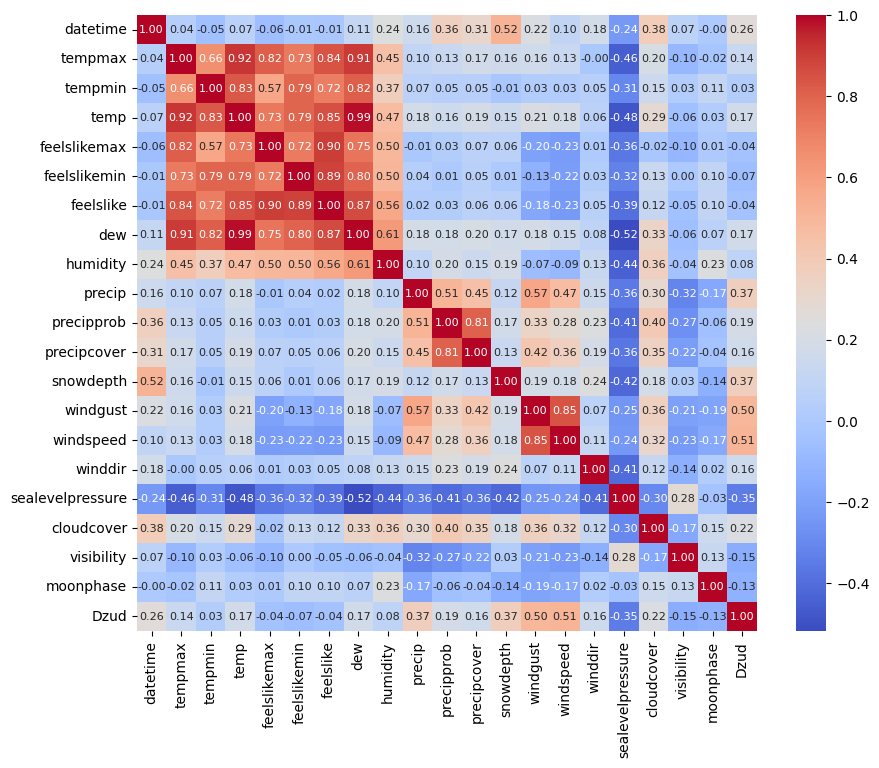

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"size": 8})

plt.show()

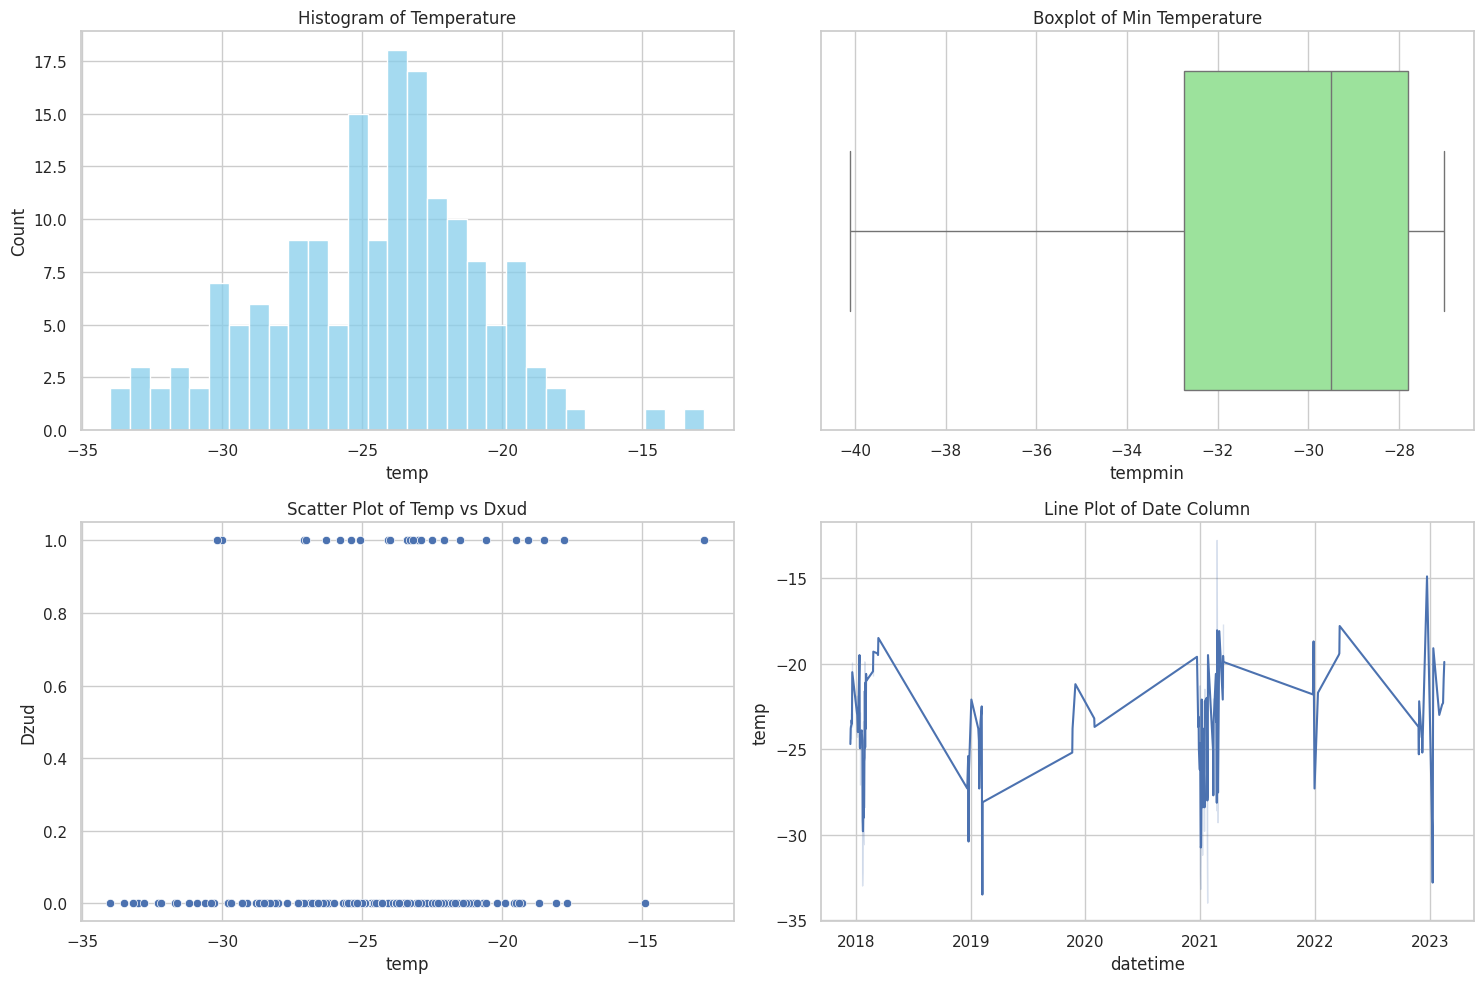

In [9]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data['temp'], bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histogram of Temperature')

sns.boxplot(x=data['tempmin'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Boxplot of Min Temperature')

sns.scatterplot(x='temp', y='Dzud', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot of Temp vs Dxud')

data.sort_values('datetime', inplace=True)
sns.lineplot(x='datetime', y='temp', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Line Plot of Date Column')

plt.tight_layout()
plt.show()

In [10]:
data = data.dropna(axis=0)
data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,precipcover,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,Dzud
43,2017-12-14,-19.1,-29.0,-24.7,-20.0,-36.2,-27.4,-27.5,77.2,0.0,...,0.00,13.2,14.4,10.8,160.2,1044.0,51.9,12.6,0.86,0
44,2017-12-15,-17.5,-28.0,-23.8,-17.5,-37.1,-27.2,-26.6,77.6,0.0,...,0.00,12.8,14.4,10.8,168.0,1044.4,54.7,13.3,0.90,0
45,2017-12-16,-17.0,-29.0,-24.4,-17.0,-30.4,-24.6,-27.3,76.7,0.0,...,0.00,12.1,11.5,7.2,192.1,1043.7,21.2,9.6,0.93,0
649,2017-12-16,-15.2,-27.2,-22.9,-16.3,-36.9,-29.8,-25.3,80.7,0.0,...,0.00,7.7,18.0,13.0,49.0,1045.7,21.7,20.0,0.93,0
46,2017-12-17,-14.0,-29.0,-23.6,-14.0,-30.4,-24.1,-26.4,77.9,0.0,...,0.00,12.0,9.7,7.2,22.6,1043.7,3.7,9.9,0.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2023-01-31,-14.0,-31.2,-23.0,-14.0,-35.5,-23.8,-26.2,75.4,0.0,...,0.00,31.0,4.7,7.2,39.5,1030.1,41.5,22.7,0.31,0
1460,2023-02-09,-14.6,-30.0,-22.4,-20.1,-39.5,-27.5,-25.1,78.7,0.2,...,4.17,35.9,16.9,14.4,294.3,1024.5,81.9,12.0,0.62,0
1463,2023-02-12,-13.4,-31.4,-22.3,-20.8,-38.6,-28.2,-24.7,80.7,0.2,...,8.33,37.1,29.9,15.1,206.0,1034.6,82.2,7.1,0.72,0
1465,2023-02-14,-10.8,-30.3,-20.9,-16.9,-36.1,-26.4,-23.7,78.8,0.0,...,0.00,37.1,30.2,13.3,92.5,1032.6,60.1,16.1,0.79,0


In [11]:
y = data['Dzud']

X = data.drop('Dzud', axis=1)

X['datetime'] = X['datetime'].apply(lambda x: x.timestamp())

X

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
43,1.513210e+09,-19.1,-29.0,-24.7,-20.0,-36.2,-27.4,-27.5,77.2,0.0,0,0.00,13.2,14.4,10.8,160.2,1044.0,51.9,12.6,0.86
44,1.513296e+09,-17.5,-28.0,-23.8,-17.5,-37.1,-27.2,-26.6,77.6,0.0,0,0.00,12.8,14.4,10.8,168.0,1044.4,54.7,13.3,0.90
45,1.513382e+09,-17.0,-29.0,-24.4,-17.0,-30.4,-24.6,-27.3,76.7,0.0,0,0.00,12.1,11.5,7.2,192.1,1043.7,21.2,9.6,0.93
649,1.513382e+09,-15.2,-27.2,-22.9,-16.3,-36.9,-29.8,-25.3,80.7,0.0,0,0.00,7.7,18.0,13.0,49.0,1045.7,21.7,20.0,0.93
46,1.513469e+09,-14.0,-29.0,-23.6,-14.0,-30.4,-24.1,-26.4,77.9,0.0,0,0.00,12.0,9.7,7.2,22.6,1043.7,3.7,9.9,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1.675123e+09,-14.0,-31.2,-23.0,-14.0,-35.5,-23.8,-26.2,75.4,0.0,0,0.00,31.0,4.7,7.2,39.5,1030.1,41.5,22.7,0.31
1460,1.675901e+09,-14.6,-30.0,-22.4,-20.1,-39.5,-27.5,-25.1,78.7,0.2,100,4.17,35.9,16.9,14.4,294.3,1024.5,81.9,12.0,0.62
1463,1.676160e+09,-13.4,-31.4,-22.3,-20.8,-38.6,-28.2,-24.7,80.7,0.2,100,8.33,37.1,29.9,15.1,206.0,1034.6,82.2,7.1,0.72
1465,1.676333e+09,-10.8,-30.3,-20.9,-16.9,-36.1,-26.4,-23.7,78.8,0.0,0,0.00,37.1,30.2,13.3,92.5,1032.6,60.1,16.1,0.79


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

predictions = rf_model.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest classifier: {accuracy}")

Accuracy of the Random Forest classifier: 0.9411764705882353


In [14]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [15]:
from sklearn.utils.class_weight import compute_class_weight

rnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
test_loss, test_acc = rnn_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Epoch 1/50
5/5 [==============================] - 3s 12ms/step - loss: 65667948.0000 - accuracy: 0.5606
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 42574892.0000 - accuracy: 0.7727
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 39301560.0000 - accuracy: 0.7727
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 42490576.0000 - accuracy: 0.7348
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 44755720.0000 - accuracy: 0.6591
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 30893448.0000 - accuracy: 0.6667
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 28217554.0000 - accuracy: 0.6818
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 27374442.0000 - accuracy: 0.7273
Epoch 9/50
5/5 [==============================] - 0s 8ms/step - loss: 28857188.0000 - accuracy: 0.7045
Epoch 10/50
5/5 [==============================] - 0s 12ms/step - loss: 

In [16]:
fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = fnn_model.fit(X_train, y_train, epochs=50, batch_size=32)

test_loss, test_accuracy = fnn_model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Epoch 1/50
5/5 [==============================] - 4s 4ms/step - loss: 96071560.0000 - accuracy: 0.4621
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 58547680.0000 - accuracy: 0.7197
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 52221712.0000 - accuracy: 0.7576
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 51237740.0000 - accuracy: 0.7727
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 61684976.0000 - accuracy: 0.7424
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 50665088.0000 - accuracy: 0.7273
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 35845052.0000 - accuracy: 0.6818
Epoch 8/50
5/5 [==============================] - 0s 5ms/step - loss: 36505416.0000 - accuracy: 0.6742
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 36741532.0000 - accuracy: 0.6591
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 38

In [17]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        self.keras_model.fit(X, y, epochs=10, batch_size=32)
        return self

    def predict(self, X):
        predictions = self.keras_model.predict(X)
        # Flatten the predictions to ensure they are in the right shape
        return (predictions.ravel() > 0.3).astype(int)

    def predict_proba(self, X):
        # This method should ensure the probabilities are returned correctly
        return self.keras_model.predict(X)

from sklearn.ensemble import VotingClassifier

# Assuming rnn_model, fnn_model, and rf_model are your pre-trained models
rnn_wrapper = KerasClassifierWrapper(rnn_model)
fnn_wrapper = KerasClassifierWrapper(fnn_model)

voting_clf = VotingClassifier(
    estimators=[
        ('rnn', rnn_wrapper),
        ('fnn', fnn_wrapper),
        ('rf', rf_model)  # Assuming rf_model is a sklearn-compatible classifier
    ],
    voting='hard'
)

# Fit and predict using the VotingClassifier
voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_test)

Epoch 1/10
5/5 [==============================] - 1s 4ms/step - loss: 3538219.7500 - accuracy: 0.6818
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 2342443.5000 - accuracy: 0.7348
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 2915742.5000 - accuracy: 0.6894
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 2867429.2500 - accuracy: 0.6970
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 1530221.7500 - accuracy: 0.6818
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 2272146.7500 - accuracy: 0.7197
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 2431101.0000 - accuracy: 0.7576
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 2439580.0000 - accuracy: 0.7121
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 1392476.6250 - accuracy: 0.6667
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 1867261.125

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the VotingClassifier:", accuracy)

Accuracy of the VotingClassifier: 0.8529411764705882


In [19]:
files = [
    'Kostanay Kazakhstan 2024-11-01 to 2026-03-31.csv',
    'petropavlovsk, kazakhstan... 2024-11-01 to 2025-03-31.csv',
    'Astana Kazakhstan 2024-11-01 to 2025-03-31.csv',
    'Atbasar kazakhstan 2023-11-01 to 2024-03-31.csv',
    'Atbasar kazakhstan 2024-11-01 to 2025-03-31.csv',
    'Atbasar kazakhstan 2025-11-01 to 2026-03-31.csv'
]
dataframes = [pd.read_csv(file) for file in files]

data_valid = pd.concat(dataframes, ignore_index=True)

dzud = []
for i in range(data_valid.shape[0]):
    if data_valid['tempmin'][i]<-27 and data_valid['snowdepth'][i]>=20 and data_valid['windspeed'][i]>=20:
        dzud.append(1)
    else:
        dzud.append(0)
dzud=np.array(dzud)
data_valid['datetime'] = pd.to_datetime(data_valid['datetime'])
data_valid['datetime'] = data_valid['datetime'].apply(lambda x: x.timestamp())

data_valid = data_valid.drop(['name', 'preciptype', 'sunrise','snow', 'sunset', 'conditions', 'description', 'icon', 'stations', 'severerisk', 'solarradiation',	'solarenergy',	'uvindex'], axis=1)
data_valid = data_valid.dropna()
data_valid

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
0,1.730419e+09,5.7,-2.5,1.6,0.0,0.0,-6.5,-2.1,78.6,1.2,0.0,0.0,4.0,56.5,23.8,209.6,1021.1,72.9,14.1,0.00
1,1.730506e+09,4.7,-3.2,0.9,0.0,0.0,-7.4,-2.5,79.4,0.6,0.0,0.0,1.0,43.2,22.7,193.4,1022.1,77.0,14.0,0.02
2,1.730592e+09,4.1,-2.3,0.9,0.0,0.0,-7.2,-1.8,83.0,0.7,4.8,2.0,2.0,50.4,22.0,195.4,1021.5,80.7,13.1,0.06
3,1.730678e+09,4.2,-2.9,0.6,0.0,0.0,-7.5,-2.4,81.5,0.3,0.0,0.0,1.0,49.3,25.2,187.2,1021.8,73.5,13.0,0.09
6,1.730938e+09,2.4,-5.1,-1.2,0.0,0.0,-10.3,-5.3,76.9,2.3,4.8,2.0,7.0,86.4,24.5,227.6,1019.3,74.7,12.7,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1.774570e+09,-0.1,-6.6,-3.3,0.0,0.0,-12.8,-5.9,83.1,1.3,0.0,0.0,60.1,68.4,29.5,205.2,1020.1,61.4,17.2,0.29
1268,1.774656e+09,1.4,-5.8,-2.2,0.0,0.0,-11.5,-4.7,83.7,0.8,0.0,0.0,59.3,65.9,31.3,195.6,1018.5,74.5,22.9,0.33
1269,1.774742e+09,1.6,-5.4,-2.1,0.0,0.0,-11.6,-4.3,85.3,1.4,0.0,0.0,57.7,57.6,28.4,199.5,1018.2,57.7,20.9,0.36
1270,1.774829e+09,1.8,-5.6,-2.0,0.0,0.0,-12.0,-4.6,83.7,0.5,0.0,0.0,55.9,82.8,32.0,206.6,1020.4,61.3,21.4,0.40


In [20]:
dzud_predictions = voting_clf.predict(data_valid)
dzud

29/29 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [21]:
pos_dzud = []
files = [
    'Kostanay Kazakhstan 2024-11-01 to 2026-03-31.csv',
    'petropavlovsk, kazakhstan... 2024-11-01 to 2025-03-31.csv',
    'Astana Kazakhstan 2024-11-01 to 2025-03-31.csv',
    'Atbasar kazakhstan 2023-11-01 to 2024-03-31.csv',
    'Atbasar kazakhstan 2024-11-01 to 2025-03-31.csv',
    'Atbasar kazakhstan 2025-11-01 to 2026-03-31.csv'
]
dataframes = [pd.read_csv(file) for file in files]

data_valid = pd.concat(dataframes, ignore_index=True)
data_valid.dropna()
dzud = []
for i in range(data_valid.shape[0]):
    if data_valid['tempmin'][i]<-27 and data_valid['snowdepth'][i]>=20 and data_valid['windspeed'][i]>=20:
        dzud.append(1)
    else:
        dzud.append(0)
dzud=np.array(dzud)
for i in range(len(dzud)):
  a = {
      'name':data_valid['name'][i].title(),
      'date': data_valid['datetime'][i],
      'temp': data_valid['tempmin'][i].astype(float),
      'isDzud': dzud[i]
  }
  pos_dzud.append(a)
pos_dzud

[{'name': 'Kostanay Kazakhstan',
  'date': '2024-11-01',
  'temp': -2.5,
  'isDzud': 0},
 {'name': 'Kostanay Kazakhstan',
  'date': '2024-11-02',
  'temp': -3.2,
  'isDzud': 0},
 {'name': 'Kostanay Kazakhstan',
  'date': '2024-11-03',
  'temp': -2.3,
  'isDzud': 0},
 {'name': 'Kostanay Kazakhstan',
  'date': '2024-11-04',
  'temp': -2.9,
  'isDzud': 0},
 {'name': 'Kostanay Kazakhstan',
  'date': '2024-11-05',
  'temp': -2.7,
  'isDzud': 0},
 {'name': 'Kostanay Kazakhstan',
  'date': '2024-11-06',
  'temp': -2.5,
  'isDzud': 0},
 {'name': 'Kostanay Kazakhstan',
  'date': '2024-11-07',
  'temp': -5.1,
  'isDzud': 0},
 {'name': 'Kostanay Kazakhstan',
  'date': '2024-11-08',
  'temp': -6.3,
  'isDzud': 0},
 {'name': 'Kostanay Kazakhstan',
  'date': '2024-11-09',
  'temp': -7.7,
  'isDzud': 0},
 {'name': 'Kostanay Kazakhstan',
  'date': '2024-11-10',
  'temp': -7.5,
  'isDzud': 0},
 {'name': 'Kostanay Kazakhstan',
  'date': '2024-11-11',
  'temp': -6.5,
  'isDzud': 0},
 {'name': 'Kostanay K

In [22]:
import json

for dictionary in pos_dzud:
    for key, value in dictionary.items():
        if isinstance(value, np.int64):
            dictionary[key] = int(value)

# Write JSON data to a file
with open('data.json', 'w', encoding='utf-8') as file:
    json.dump(pos_dzud, file, indent=4)

# Optionally, to verify what was written, print it out
print("JSON data written to file:")
with open('data.json', 'r', encoding='utf-8') as file:
    print(file.read())

JSON data written to file:
[
    {
        "name": "Kostanay Kazakhstan",
        "date": "2024-11-01",
        "temp": -2.5,
        "isDzud": 0
    },
    {
        "name": "Kostanay Kazakhstan",
        "date": "2024-11-02",
        "temp": -3.2,
        "isDzud": 0
    },
    {
        "name": "Kostanay Kazakhstan",
        "date": "2024-11-03",
        "temp": -2.3,
        "isDzud": 0
    },
    {
        "name": "Kostanay Kazakhstan",
        "date": "2024-11-04",
        "temp": -2.9,
        "isDzud": 0
    },
    {
        "name": "Kostanay Kazakhstan",
        "date": "2024-11-05",
        "temp": -2.7,
        "isDzud": 0
    },
    {
        "name": "Kostanay Kazakhstan",
        "date": "2024-11-06",
        "temp": -2.5,
        "isDzud": 0
    },
    {
        "name": "Kostanay Kazakhstan",
        "date": "2024-11-07",
        "temp": -5.1,
        "isDzud": 0
    },
    {
        "name": "Kostanay Kazakhstan",
        "date": "2024-11-08",
        "temp": -6.3,
      